In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns
%matplotlib inline
import warnings
import io
import datetime
from sklearn.ensemble._forest import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from numpy import allclose
from sklearn.metrics import confusion_matrix

import math
import datetime
import numpy as np 
import pandas as pd 
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.max_rows', 100)
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') 
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings("ignore")
import plotly
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go
from pylab import rcParams

import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error

from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import StratifiedKFold

warnings.filterwarnings('ignore')
# try RFE / pca or lda

In [13]:
df=pd.read_csv('CS3244_parsed_data (2).csv', index_col = 0)

In [14]:
#factorization of etf names
df['name'] = pd.factorize(df['name'])[0]

In [15]:
#splitting of data into training and test by time
#date formatted as integers
train_split_date1_start = pd.datetime(2005,1,1)
train_split_date1_end = pd.datetime(2007,12,31)

train_split_date2_start = pd.datetime(2009,1,1)
train_split_date2_end = pd.datetime(2011,12,31)

test_split_date2_start = pd.datetime(2012,1,1)
test_split_date2_end = pd.datetime(2012,12,31)

train_split_date3_start = pd.datetime(2013,1,1)
train_split_date3_end = pd.datetime(2016,12,31)

test_split_date3_start = pd.datetime(2017,1,1)
test_split_date3_end = pd.datetime(2017,12,31)

df['date'] = pd.to_datetime(df['date'],  format='%d/%m/%Y')

mask_train1 = (df['date'] > train_split_date1_start) & (df['date'] <= train_split_date1_end)
df_training1 = df.loc[mask_train1]

mask_train2 = (df['date'] > train_split_date2_start) & (df['date'] <= train_split_date2_end)
df_training2 = df.loc[mask_train2]
mask_test2 = (df['date'] > test_split_date2_start) & (df['date'] <= test_split_date2_end)
df_test2 = df.loc[mask_test2]

mask_train3 = (df['date'] > train_split_date3_start) & (df['date'] <= train_split_date3_end)
df_training3 = df.loc[mask_train3]
mask_test3 = (df['date'] > test_split_date3_start) & (df['date'] <= test_split_date3_end)
df_test3 = df.loc[mask_test3]

train_data = pd.concat([df_training1, df_training2, df_training3])
test_data = pd.concat([df_test2, df_test3])

train_data['date'] = pd.to_datetime(train_data.date, format='%d/%m/%Y')
train_data['date1'] = train_data['date'].dt.strftime('%Y-%m-%d')
train_data['date'] = train_data['date1'].str.replace('\D', '').astype(int)
del(train_data['date1'])

test_data['date'] = pd.to_datetime(test_data.date, format='%d/%m/%y')
test_data['date1'] = test_data['date'].dt.strftime('%Y-%m-%d')
test_data['date'] = test_data['date1'].str.replace('\D', '').astype(int)
del(test_data['date1'])

In [57]:
#data split arbitrarily
x_train_alt, x_test_alt,  y_train_alt , y_test_alt = train_test_split(df.drop(['name', 'range', 'vol', 'sd7', 'vol7', 'dir7', 'tend7', 'sd30', 'vol30', 'dir30', 'tend30','RSI', 'stosc','MACD', 'dirNext1', 'dirNext7', 'dirNext30'], axis=1), df['dirNext30'], test_size=0.33, shuffle=False)

x_train_alt['date'] = pd.to_datetime(x_train_alt.date, format='%d/%m/%y')
x_train_alt['date1'] = x_train_alt['date'].dt.strftime('%Y-%m-%d')
x_train_alt['date'] = x_train_alt['date1'].str.replace('\D', '').astype(int)
del(x_train_alt['date1'])

x_test_alt['date'] = pd.to_datetime(x_test_alt.date, format='%d/%m/%y')
x_test_alt['date1'] = x_test_alt['date'].dt.strftime('%Y-%m-%d')
x_test_alt['date'] = x_test_alt['date1'].str.replace('\D', '').astype(int)
del(x_test_alt['date1'])

In [58]:
#feature elimnation based on mutual information
x_train = train_data.drop(['name', 'range', 'vol', 'sd7', 'vol7', 'dir7', 'tend7', 'sd30', 'vol30', 'dir30', 'tend30','RSI', 'stosc','MACD', 'dirNext1', 'dirNext7', 'dirNext30'], axis=1)
x_test = test_data.drop(['name', 'range', 'vol', 'sd7', 'vol7', 'dir7', 'tend7', 'sd30', 'vol30', 'dir30', 'tend30','RSI', 'stosc','MACD', 'dirNext1', 'dirNext7', 'dirNext30'], axis=1)
y_train30 = train_data['dirNext30']
y_test30 = test_data['dirNext30']

date
open
close
high
low
avg
avg7
range7
avg30
range30
Feature 0: 0.004835
Feature 1: 0.314360
Feature 2: 0.031793
Feature 3: 0.030668
Feature 4: 0.004790
Feature 5: 0.032220
Feature 6: 0.031767
Feature 7: 0.022284
Feature 8: 0.002626
Feature 9: 0.027370
Feature 10: 0.009255
Feature 11: 0.038210
Feature 12: 0.002223
Feature 13: 0.005634
Feature 14: 0.010567
Feature 15: 0.029246
Feature 16: 0.009176
Feature 17: 0.169565
Feature 18: 0.005225
Feature 19: 0.007155
Feature 20: 0.010582
Feature 21: 0.008622
Feature 22: 0.007057
Feature 23: 0.009909


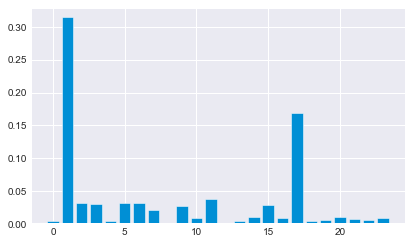

In [18]:
#mutual information code 
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from matplotlib import pyplot

# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select all features
	fs = SelectKBest(score_func=mutual_info_classif, k='all')
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

# split into train and test sets
x_train_mi, x_test_mi,  y_train_mi , y_test_mi = train_test_split(df.drop(['dirNext1','dirNext7', 'dirNext30'], axis=1), df['dirNext30'], test_size=0.33, shuffle=False)

x_train_mi['date'] = pd.to_datetime(x_train_mi.date, format='%d/%m/%y')
x_train_mi['date1'] = x_train_mi['date'].dt.strftime('%Y-%m-%d')
x_train_mi['date'] = x_train_mi['date1'].str.replace('\D', '').astype(int)
del(x_train_mi['date1'])

x_test_mi['date'] = pd.to_datetime(x_test_mi.date, format='%d/%m/%y')
x_test_mi['date1'] = x_test_mi['date'].dt.strftime('%Y-%m-%d')
x_test_mi['date'] = x_test_mi['date1'].str.replace('\D', '').astype(int)
del(x_test_mi['date1'])

for col in x_train_alt.columns:
    print(col)
    # feature selection
X_train_fs, X_test_fs, fs = select_features(x_train_mi, y_train_mi, x_test_mi)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

Relevant features based on information gain correspond to 1, 2, 3, 5, 6, 7, 9, 11, 15, 17

keep: 
date, 
open, 
close, 
high, 
low, 
avg, 
avg7, 
range7, 
avg30, 
range30

drop:
name, 
range, 
vol, 
sd7, 
vol7, 
dir7, 
tend7, 
sd30,  
vol30, 
dir30, 
tend30, 
RSI,
stosc, 
MACD, 

In [65]:
import time
start = time.time()

# enter your code here

#model built on data with a 66-33 arbitrary split
RF_Model = RandomForestClassifier(n_estimators=100, oob_score=True, min_samples_leaf = 50)
labels = y_train_alt
features = x_train_alt
rfc_alt=RF_Model.fit(features, labels)
y_test_alt_predict=rfc_alt.predict(x_test_alt)

end = time.time()
print(end - start, "seconds")

49.72075819969177 seconds


In [60]:
#model built with our time splits
RF_Model = RandomForestClassifier(n_estimators=100, oob_score=True, min_samples_leaf = 50)
labels = y_train30
features = x_train
rfc=RF_Model.fit(features, labels)
y_test_predict=rfc.predict(x_test)

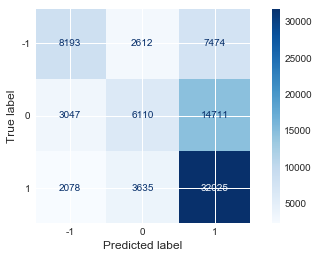

In [61]:
#slight improvement for model built with 66-33 arbitrary split
plot_confusion_matrix(rfc_alt, x_test_alt, y_test_alt, cmap=plt.cm.Blues, values_format='')
plt.show()

In [62]:
#slight improvement for model built with 66-33 arbitrary split
print(classification_report(y_test_alt, y_test_alt_predict, labels=[-1, 0, 1]))

              precision    recall  f1-score   support

          -1       0.62      0.45      0.52     18279
           0       0.49      0.26      0.34     23868
           1       0.59      0.85      0.70     37738

    accuracy                           0.58     79885
   macro avg       0.57      0.52      0.52     79885
weighted avg       0.57      0.58      0.55     79885



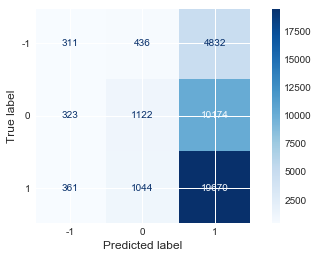

In [63]:
#slightly worse results for model built with our time splits
plot_confusion_matrix(rfc, x_test, y_test30, cmap=plt.cm.Blues, values_format='')
plt.show()

In [64]:
#slightly worse results for model built with our time splits
print(classification_report(y_test30, y_test_predict, labels=[-1, 0, 1]))

              precision    recall  f1-score   support

          -1       0.31      0.06      0.09      5579
           0       0.43      0.10      0.16     11619
           1       0.57      0.93      0.71     21075

    accuracy                           0.55     38273
   macro avg       0.44      0.36      0.32     38273
weighted avg       0.49      0.55      0.45     38273

